In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 모델링

In [7]:
df_pre = pd.read_csv('data/df_pre.csv')
print(np.shape(df_pre))
df_pre.tail()

(26729, 23)


,Unnamed: 0,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


In [8]:
del df_pre['Unnamed: 0']

In [9]:
print(np.shape(df_pre))
df_pre.tail()

(26729, 22)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


# Random Forest (전체 feature importances) 

In [85]:
columns = ['Name', 'DateTime','AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

train score: 0.9999584303292318
test score: 0.6105499438832772
log loss: 1.2224696657297092



Feature ranking:
1. feature 1 (0.307602)
2. feature 4 (0.158759)
3. feature 6 (0.158373)
4. feature 3 (0.151604)
5. feature 5 (0.145319)
6. feature 0 (0.052369)
7. feature 2 (0.025976)


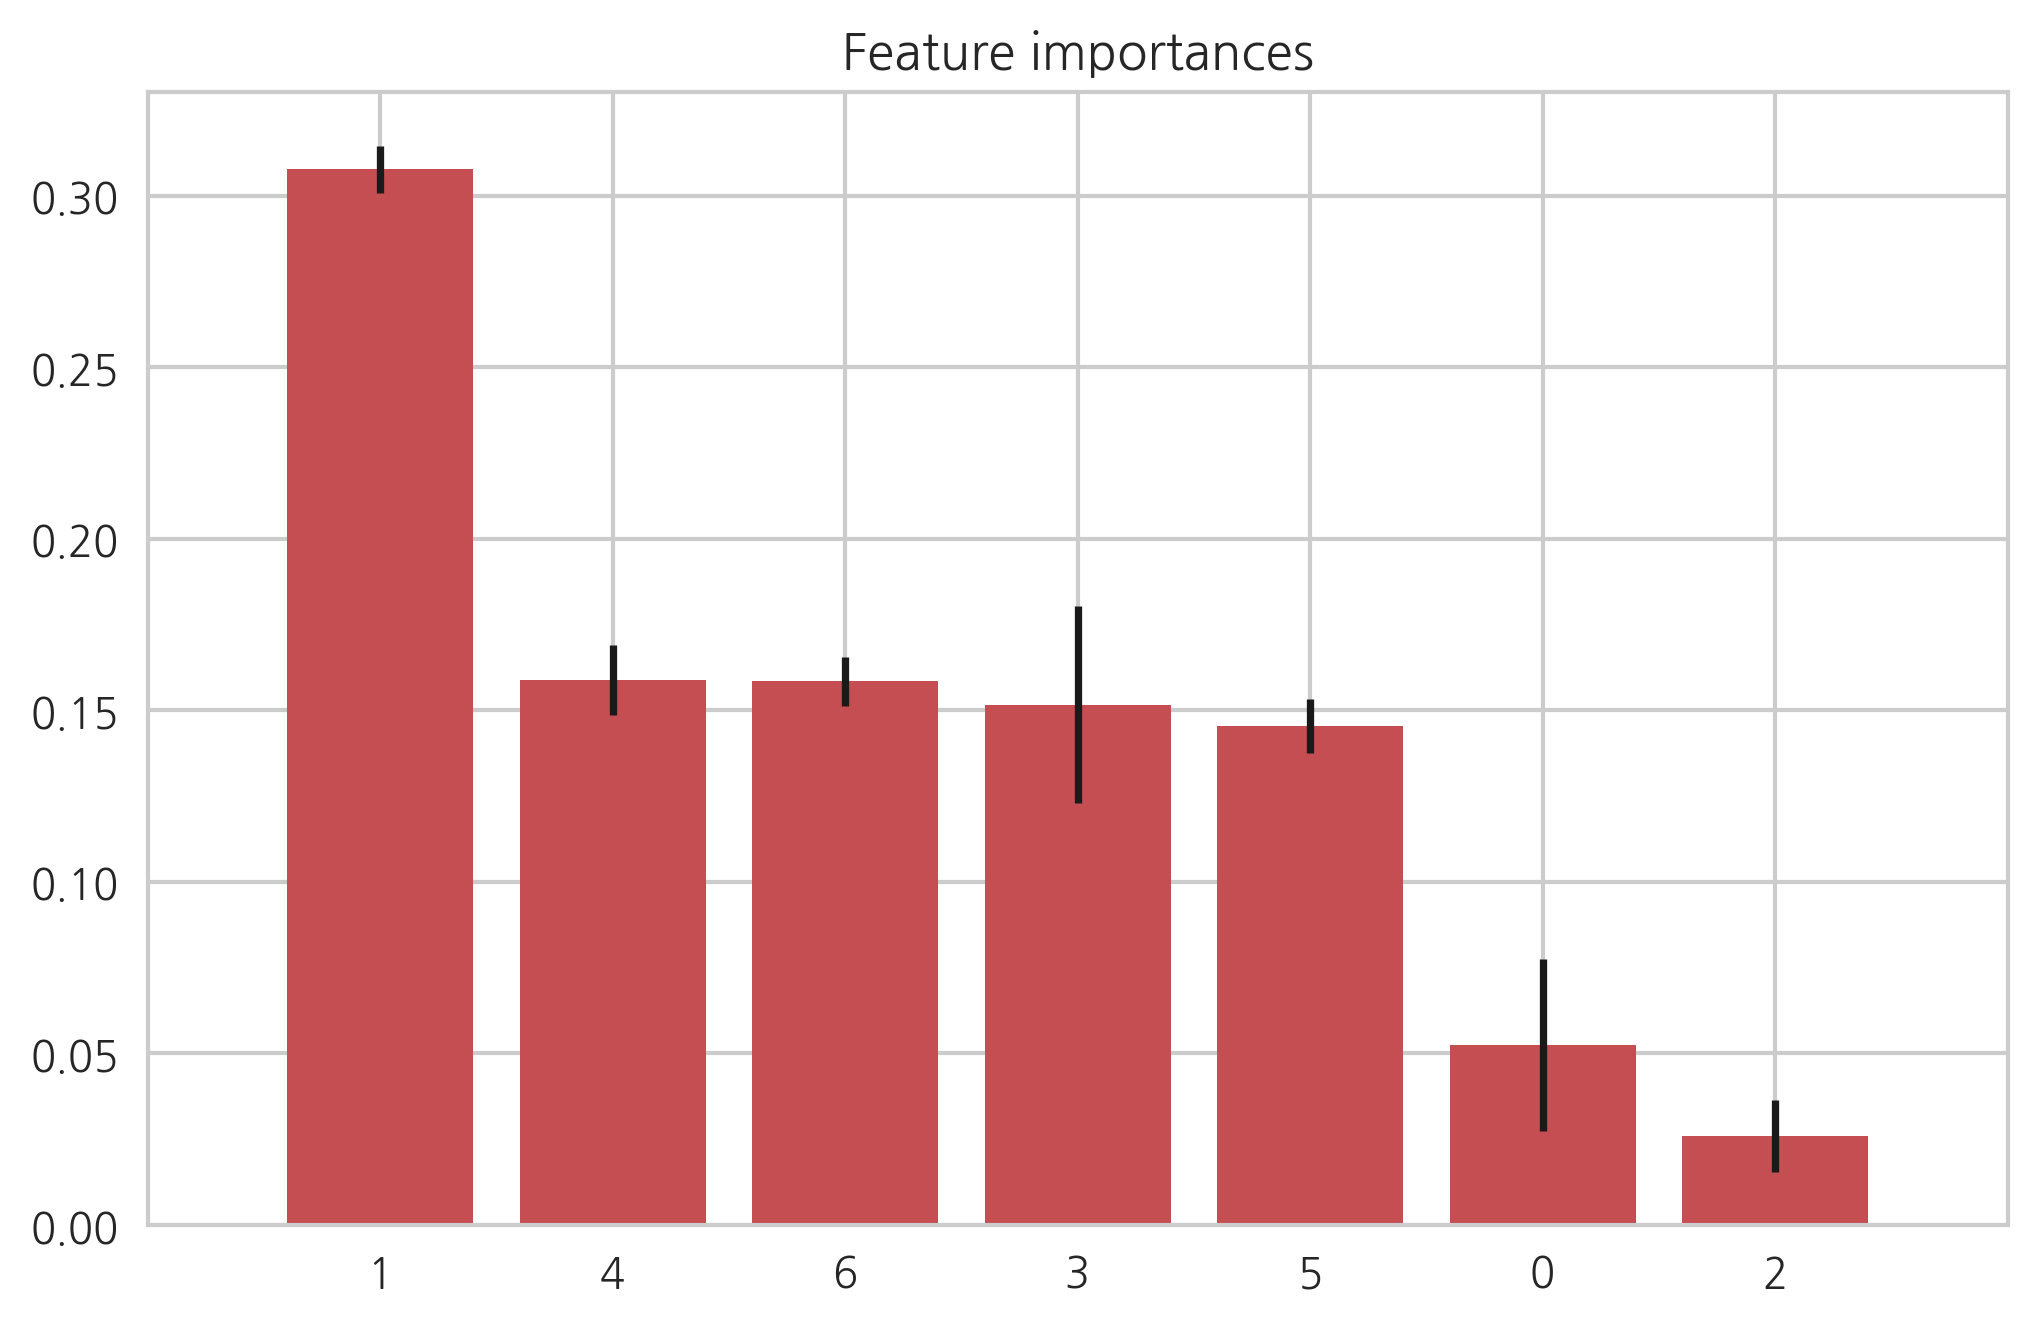

In [86]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

In [87]:
df_x.iloc[0, [1,4,6,3,5,0,2]]

DateTime          3361
AgeuponOutcome       5
Color              130
SexuponOutcome       2
Breed             1221
Name                 1
AnimalType           1
Name: 0, dtype: int64

# Random Forest (전체 feature importances) _전처리만

In [17]:
columns = ['Name', 'AnimalType', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome','BreedMix','Breed_pre','YearMonth','Group', 'Size']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

train score: 0.953732956434985
test score: 0.6356154133931912
log loss: 1.4650867828130232



Feature ranking:
1. feature 7 (0.242232)
2. feature 4 (0.241951)
3. feature 6 (0.159384)
4. feature 2 (0.157350)
5. feature 3 (0.118608)
6. feature 0 (0.050618)
7. feature 1 (0.021469)
8. feature 5 (0.008387)


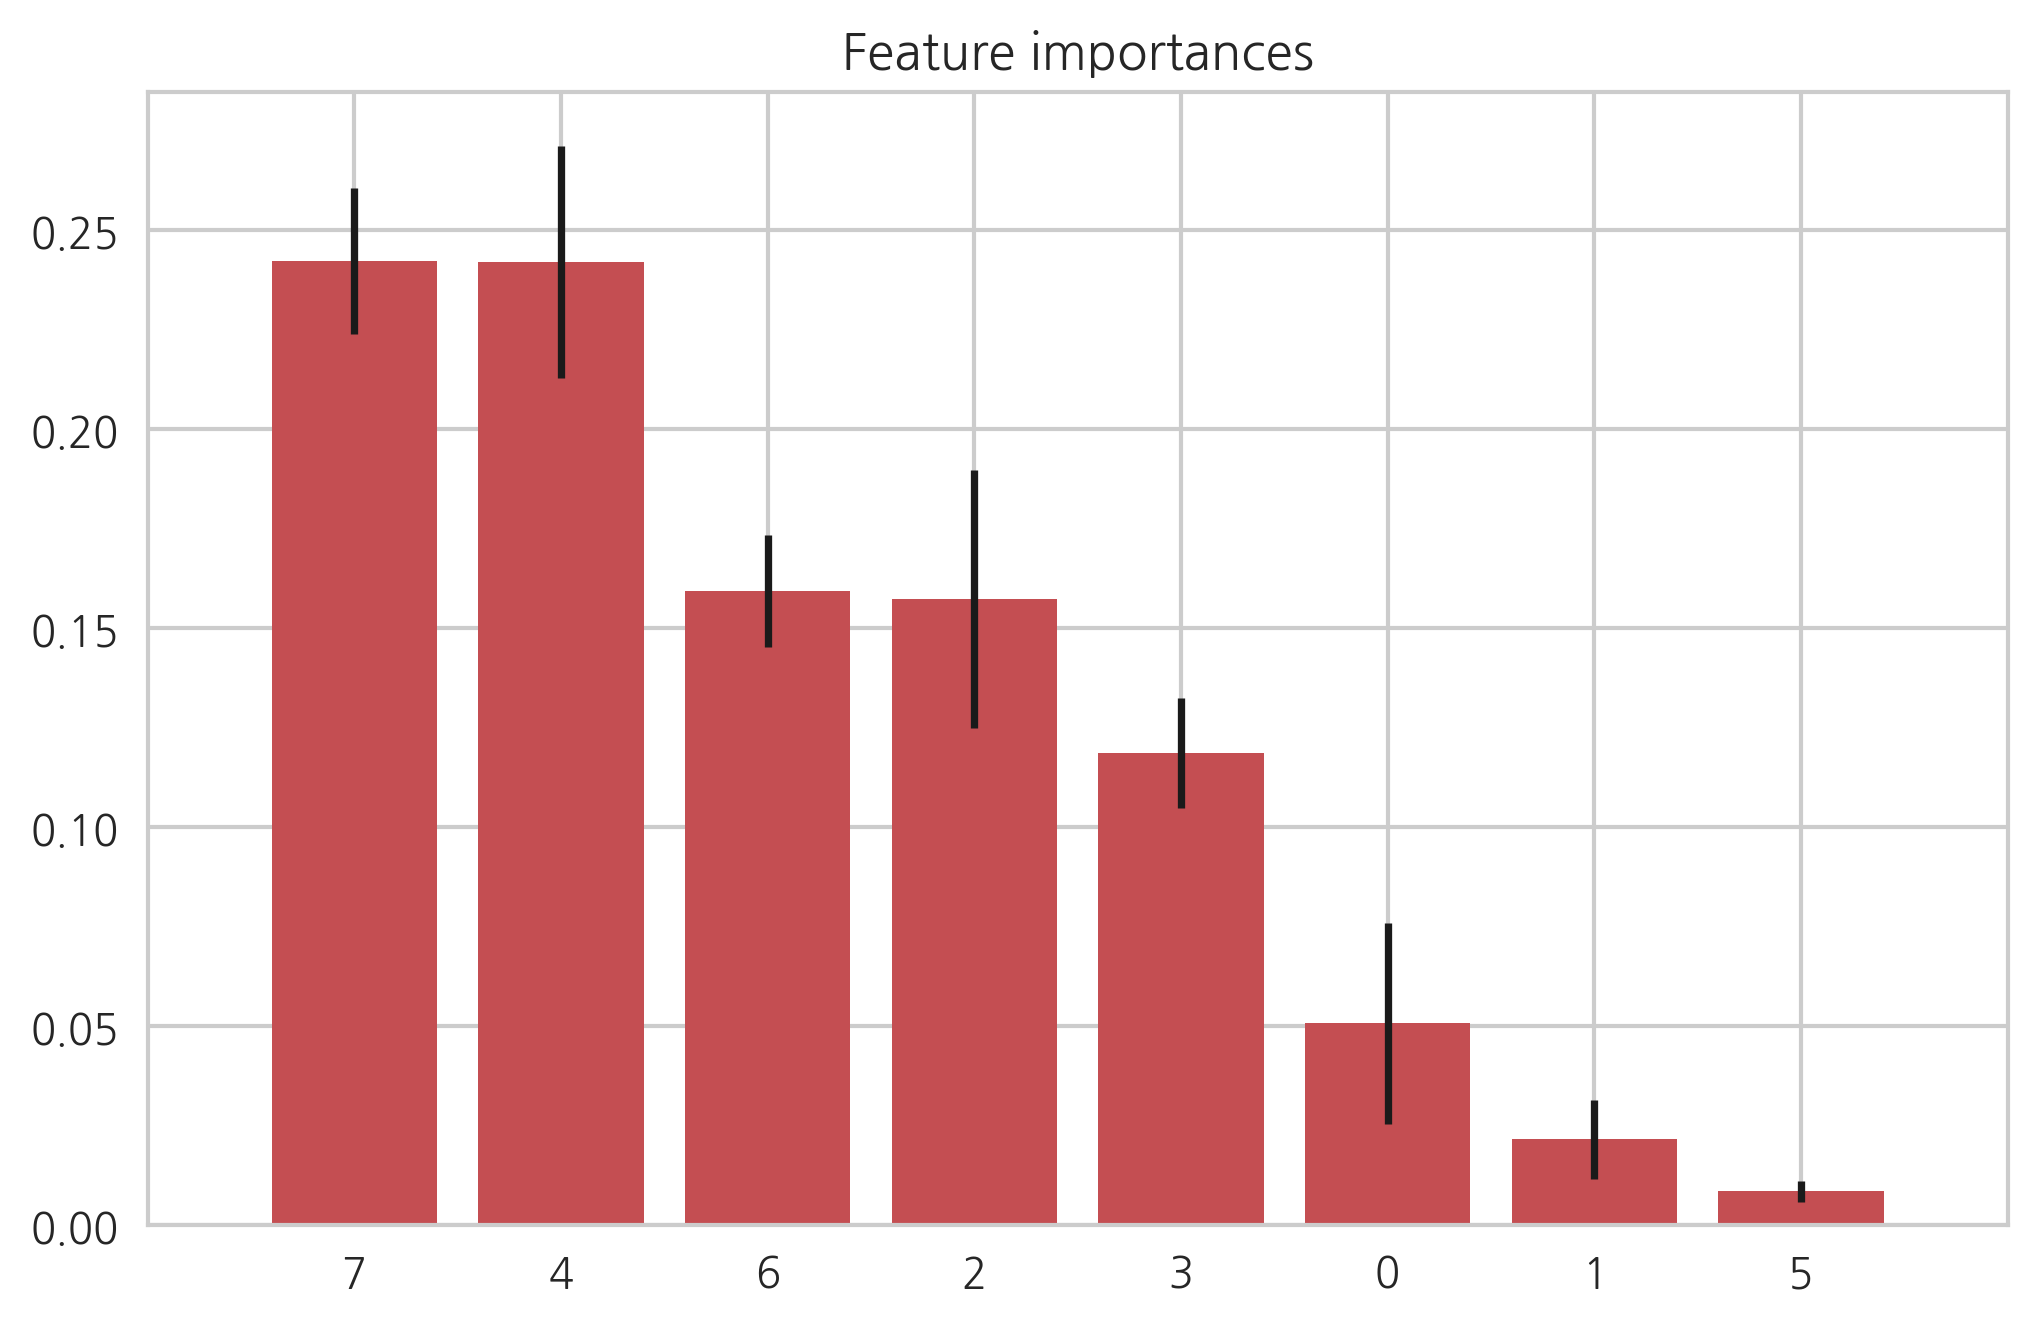

In [15]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

In [11]:
df_x.iloc[0, [4,2,3,7,10,9,0,5,13,14,8,11,12,1,6]]

DayuponOutcome    365
SexuponOutcome      2
Color_pre           2
Breed_pre         181
YearMonth           4
Month               1
Name                1
AboutAge            2
Group               0
Size                3
Year                1
Season              3
Quarter             0
AnimalType          1
BreedMix            1
Name: 0, dtype: int64

In [17]:
from sklearn.model_selection import GridSearchCV

def model_cv(X_train, X_test, y_train, y_test, model_xgb, name):
    model_xgb.fit(X_train, y_train)
    print(name,': ',model_xgb.best_params_)
    pred_y = model_xgb.predict_proba(X_test)
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, pred_y)))
    print()

def xgbc(X_train, X_test, y_train, y_test):
    param = [{'n_estimators' : [100, 400, 800],
             'learning_rate' : [0.1, 0.2, 0.3],
             'max_depth' : [3, 5, 8]}]
    model_xgb = GridSearchCV(XGBClassifier(), param)
    name = 'XGBoost'
    return model_cv(X_train, X_test, y_train, y_test, model_xgb, name)

In [18]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

#columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']


df_x = df_x.iloc[:, [4,2,3,7,10,9,0,5,13,14]]
df_y = df_pre['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.1, random_state=0, shuffle=True)

xgbc(X_train, X_test, y_train, y_test)

IndexError: positional indexers are out-of-bounds

In [19]:
from sklearn.model_selection import GridSearchCV

def model_cv(X_train, X_test, y_train, y_test, model_xgb, name):
    model_xgb.fit(X_train, y_train)
    print(name,': ',model_xgb.best_params_)
    pred_y = model_xgb.predict_proba(X_test)
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, pred_y)))
    print()

def xgbc(X_train, X_test, y_train, y_test):
    param = [{'n_estimators' : [100, 300, 600, 900],
             'learning_rate' : [0.1, 0.15, 0.2, 0.25, 0.3],
             'max_depth' : [3, 4, 5, 6],
             'colsample_bytree' : [0.5, 0.75, 1],
             'subsample' : [0.5, 0.75, 1]}]
    model_xgb = GridSearchCV(XGBClassifier(), param)
    name = 'XGBoost'
    return model_cv(X_train, X_test, y_train, y_test, model_xgb, name)

In [20]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['DayuponOutcome', 'SexuponOutcome', 'Color_pre', 'Breed_pre', 'YearMonth', 'Name', 'AboutAge']

df_x = df_pre[columns]
df_y = df_pre['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.1, random_state=0, shuffle=True)

xgbc(X_train, X_test, y_train, y_test)

KeyboardInterrupt: 

# Random Forest 

- feature importance mean 기준으로 0.05이상인 변수만 사용하였을때
- ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'Month']

In [9]:
df_x.iloc[0, [3,1,8,6,0,7,14,4,0,5,11]]

SexuponOutcome       2
DateTime          3361
DayuponOutcome     365
Color              130
Name                 1
Color_pre            2
YearMonth            4
AgeuponOutcome       5
Name                 1
Breed             1221
Breed_pre          181
Name: 0, dtype: int64

In [13]:
columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=1000, max_features=6, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

train score: 1.0
test score: 0.6279461279461279
log loss: 0.9736536512728773



# AdaBoost 

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

model_ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), 
                               algorithm="SAMME", n_estimators=300)
model_ada.fit(X_train, y_train)
model_ada_probs = model_ada.predict_proba(X_test)

print('train score: {}'.format(model_ada.score(X_train, y_train)))
print('test score: {}'.format(model_ada.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_ada_probs)))
print()

train score: 1.0
test score: 0.5596707818930041
log loss: 1.5247705012978447



# Random Forest 

- 1 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

In [54]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5555555555555556
log loss: 1.8783832389364936



- 2 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month']

In [55]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5589225589225589
log loss: 1.7170981928568472



- 3 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth']

In [56]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5632248410026188
log loss: 1.5379631569883232



- 4 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season']

In [57]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8146658560538745
test score: 0.5538720538720538
log loss: 1.9324877419822



- 5 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter']

In [58]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8142917270729084
test score: 0.5544332210998878
log loss: 1.987696300439277



- 6 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

In [5]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7025206940092596
test score: 0.5284324728769173
log loss: 1.969618631399007



- 7 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

In [8]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7749146518262171
test score: 0.5145903479236813
log loss: 1.9821968064766362



- 8 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

In [7]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8252817658887902
test score: 0.5216984661429106
log loss: 1.9294567976580403



- 9 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

In [9]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7130898377215545
test score: 0.5198279087167976
log loss: 1.9335018433205342



- 10 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

In [10]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7138380956834869
test score: 0.5200149644594089
log loss: 1.9571902704406532



- 11 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

In [11]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5591096146651702
log loss: 1.906976682291443



- 12 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

In [12]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5679012345679012
log loss: 1.7606278281994434



- 13 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

In [13]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5714552936775159
log loss: 1.5198682544580564



# XGB

- 1 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

In [49]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5945377168778937
test score: 0.5879161990273102
log loss: 0.9419117317023853



- 2 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month']

In [50]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5972969181125193
test score: 0.5909090909090909
log loss: 0.9424389463605821



- 3 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth']

In [51]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5962680634148623
test score: 0.5858585858585859
log loss: 0.9409886168579411



- 4 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season']

In [52]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.595893934433896
test score: 0.5869809203142536
log loss: 0.9423555224303615



- 5 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter']

In [53]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5959874666791376
test score: 0.5881032547699214
log loss: 0.9420503211973164



- 6 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

In [54]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.568255155965019
test score: 0.5516273849607183
log loss: 1.022753250343029



- 7 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

In [55]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5693307767852968
test score: 0.5542461653572764
log loss: 1.0211204232022952



- 8 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

In [56]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5702193331150914
test score: 0.5520014964459409
log loss: 1.0190144830062466



- 9 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

In [57]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5691437122948136
test score: 0.5563037785260008
log loss: 1.0227650995158966



- 10 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

In [58]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.569891970256746
test score: 0.5553684998129442
log loss: 1.0225033374859338



- 11 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

In [59]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.599214329139971
test score: 0.5931537598204265
log loss: 0.9373516860134757



- 12 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

In [102]:
columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix','YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.6629115397406052
test score: 0.6558174335952114
log loss: 0.8219519577881415



In [103]:
columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix','YearMonth','Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.6629115397406052
test score: 0.6558174335952114
log loss: 0.8219519577881415



In [105]:
columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix','YearMonth','Year','Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.6665281010974393
test score: 0.6603067714178825
log loss: 0.8206215183018211



- 13 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

In [61]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=200)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.5982322405649347
test score: 0.5901608679386458
log loss: 0.935788553179194



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

model = LogisticRegression().fit(X_train, y_train)
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

train score: 0.56331060857998
test score: 0.5664047886270108
log loss: 1.0485084178130732



# Gradient Boosting 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

model_grad = GradientBoostingClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)
model_probs = model_grad.predict_proba(X_test)

print('train score: {}'.format(model_grad.score(X_train, y_train)))
print('test score: {}'.format(model_grad.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

train score: 0.7768124376454939
test score: 0.6715301159745605
log loss: 0.8472990786298175



# XGBoost 

- 적당한 test size 탐색

In [18]:
import xgboost
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['SexuponOutcome', 'DateTime', 'DayuponOutcome', 'Color', 'Breed', 'YearMonth', 'AgeuponOutcome', 'Name', 'Month', 'Breed_pre']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
for_cv = np.linspace(0.1, 0.9, 9)
for i in for_cv:
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=i, random_state=0, shuffle=True)

    model_xgb = xgboost.XGBClassifier(n_estimators=100).fit(X_train, y_train)
    model_probs = model_xgb.predict_proba(X_test)
    print('test size = ', i, '\n')
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, model_probs)))
    print()

test size =  0.1 

train score: 0.6501496508147655
test score: 0.6427235316124205
log loss: 0.8361748305469573

test size =  0.2 

train score: 0.6512650236168919
test score: 0.6419753086419753
log loss: 0.8422015675612203

test size =  0.3 

train score: 0.6504543025120256
test score: 0.6412270856715301
log loss: 0.8474870156396883

test size =  0.4 

train score: 0.6525534701003929
test score: 0.6421623643845866
log loss: 0.8566757387436684

test size =  0.5 

train score: 0.6516761448668064
test score: 0.6424242424242425
log loss: 0.8564755970151559

test size =  0.6 

train score: 0.6537274342905247
test score: 0.6419129567277715
log loss: 0.8564711488490223

test size =  0.7 

train score: 0.6561486655026191
test score: 0.6406926406926406
log loss: 0.859508276350064

test size =  0.8 

train score: 0.6570626753975678
test score: 0.6365506921062477
log loss: 0.8633589029412827

test size =  0.9 

train score: 0.6792664670658682
test score: 0.6314170511701376
log loss: 0.87736393178

# 최종 버전 1

In [13]:
columns=['SexuponOutcome','Color_pre','DayuponOutcome','Breed_pre','Name','YearMonth', 'Month','AnimalType','BreedMix']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.6651563019620884
test score: 0.6606808829031051
log loss: 0.8140935335622587



In [14]:
columns=['SexuponOutcome','Color_pre','DayuponOutcome','Breed_pre','Name','YearMonth', 'Month','AnimalType','BreedMix']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('log loss: {}'.format(np.mean(-cross_val_score(model_xgb, X_test, y_test, scoring="neg_log_loss", cv=cv))))
print()

log loss: 0.8794564665349253



# 최종 버전 2

In [15]:
columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix', 'DateTime','Group','AnimalType']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=0, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('train score: {}'.format(model_xgb.score(X_train, y_train)))
print('test score: {}'.format(model_xgb.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, xgb_probs)))
print()

train score: 0.673885932823412
test score: 0.666292555181444
log loss: 0.8066757063322492



In [16]:
columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix', 'DateTime','Group','AnimalType']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth = 5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)
xgb_probs = model_xgb.predict_proba(X_test)

print('log loss: {}'.format(np.mean(-cross_val_score(model_xgb, X_test, y_test, scoring="neg_log_loss", cv=cv))))
print()

log loss: 0.8756313620324694



# parameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

def model_cv(X_train, X_test, y_train, y_test, model_xgb, name):
    model_xgb.fit(X_train, y_train)
    print(name,': ',model_xgb.best_params_)
    pred_y = model_xgb.predict_proba(X_test)
    print('train score: {}'.format(model_xgb.score(X_train, y_train)))
    print('test score: {}'.format(model_xgb.score(X_test, y_test)))
    print('log loss: {}'.format(log_loss(y_test, pred_y)))
    print()

def xgbc(X_train, X_test, y_train, y_test):
    param = [{'n_estimators' : [300, 600, 900],
             'learning_rate' : [0.081, 0.205, 0.28],
             'max_depth' : [2, 5, 8]}]
    model_xgb = GridSearchCV(XGBClassifier(), param)
    name = 'XGBoost'
    return model_cv(X_train, X_test, y_train, y_test, model_xgb, name)

v1

In [15]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns=['SexuponOutcome','Color_pre','DayuponOutcome','Breed_pre','Name','YearMonth', 'Month','AnimalType','BreedMix']

df_x = df_pre[columns]
df_y = df_pre['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.1, random_state=0, shuffle=True)

xgbc(X_train, X_test, y_train, y_test)

XGBoost :  {'learning_rate': 0.081, 'max_depth': 5, 'n_estimators': 300}
train score: 0.6890172929830396
test score: 0.6644219977553311
log loss: 0.8170722548949528



v2

In [16]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

columns = ['Name', 'SexuponOutcome', 'Color_pre', 'DayuponOutcome', 'Breed_pre', 'BreedMix', 'DateTime','Group','AnimalType']


df_x = df_pre[columns]
df_y = df_pre['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.1, random_state=0, shuffle=True)

xgbc(X_train, X_test, y_train, y_test)

XGBoost :  {'learning_rate': 0.28, 'max_depth': 5, 'n_estimators': 300}
train score: 0.8155969404722314
test score: 0.6782641227085672
log loss: 0.799511464841267



## 비대칭

In [11]:
df_imb = pd.read_csv('data/df_pre.csv')
del df_imb['Unnamed: 0']
print(np.shape(df_imb))
df_imb.tail()

(26729, 22)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


In [18]:
from imblearn.combine import *
X, y = SMOTEENN(random_state=0).fit_sample(df_x, df_y)
print(np.shape(X), np.shape(y))

(20569, 7) (20569,)


In [22]:
columns=['SexuponOutcome','Color_pre','DayuponOutcome','Breed_pre','Name','YearMonth', 'Month','AnimalType','BreedMix']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
df_imb_x = df_imb[columns]
df_imb_y = df_imb.iloc[:, [3]]

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)

import xgboost
from sklearn.metrics import *

model_xgb = xgboost.XGBClassifier(n_estimators=100)
model_xgb.fit(df_x, df_y)

model_xgb_imb = xgboost.XGBClassifier(n_estimators=100)
model_xgb_imb.fit(df_imb_x, df_imb_y)

print('log loss: {}'.format(np.mean(-cross_val_score(model_xgb, df_x, df_y, scoring="neg_log_loss", cv=10))))
print()
print('log loss: {}'.format(np.mean(-cross_val_score(model_xgb, X_test, y_test, scoring="neg_log_loss", cv=10))))
print()

OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/5/libgomp.1.dylib
  Referenced from: /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so
  Reason: image not found

/bin/sh: brew: command not found
